In [19]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
# from matplotlib import cmsweep
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt

from psPlotKit.data_plotter.fig_generator import figureGenerator

In [20]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['font.size'] = 18
text_size_default = 18

In [21]:
data_seawater = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea_reaktoro.csv')
data_bw = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_bw_reaktoro.csv')
data_seawater_OP = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_sea_reaktoro_osm_p.csv')
data_bw_OP = pd.read_csv(r'C:\Users\sss0031\Documents\GitHub\watertap\watertap\flowsheets\property_analysis\prop_data\data_property_bw_reaktoro_osm_p.csv')

In [22]:

data_sea = pd.concat([data_seawater, data_seawater_OP["Osmotic Pressure"]], axis=1)
data_bw = pd.concat([data_bw, data_bw_OP["Osmotic Pressure"]], axis=1)

In [23]:
# # find errors and create dataframe
# results_col = ["# Feed Mass Frac","Density","Enthalpy","Vapor Pressure","Osmotic Pressure"] 
# abs_dif = pd.DataFrame()

# for i in results_col:
#     abs_dif[i] = pd.DataFrame((abs(data_sea[i] - data_bw[i])/data_sea[i])*100)
    

In [24]:

# for i in results_col:
#     print(i)
#     print(np.max(abs_dif[i]))

In [25]:
sea_color = "#FFD046"
bw_color = "#4A7B9D"


title_size = 18
plt.rcParams["font.family"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['font.size'] = 18

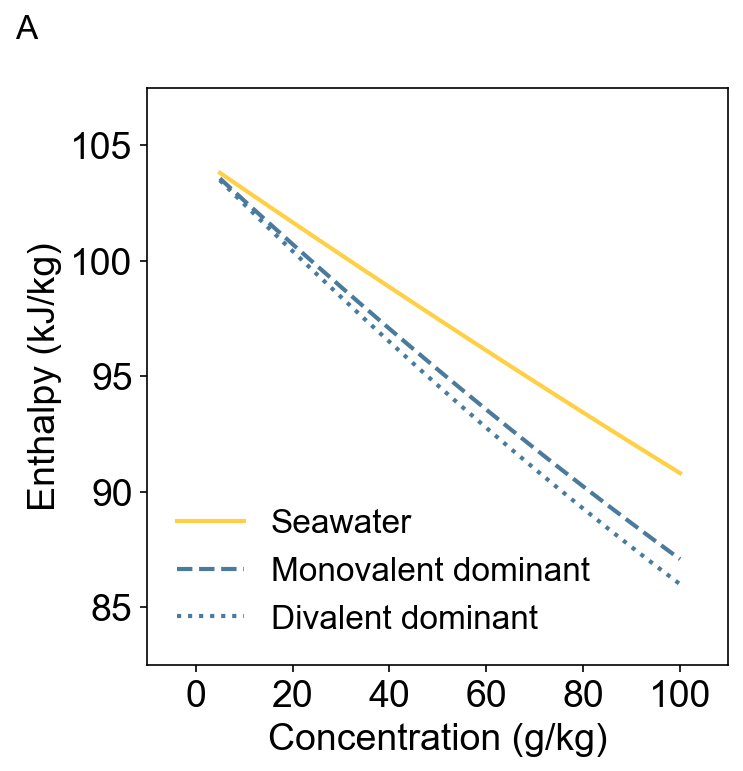

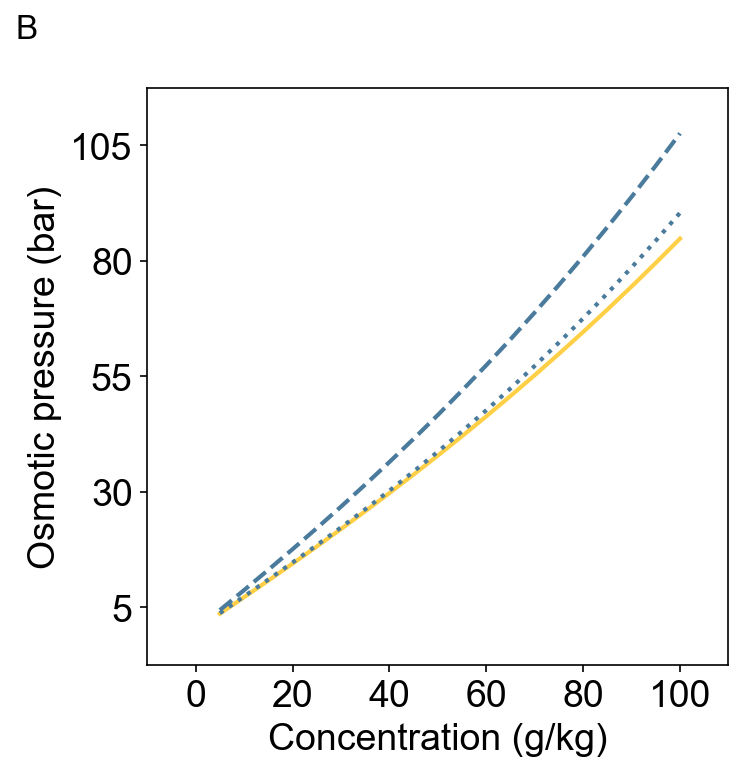

In [26]:
data_bw_2 = data_bw[(data_bw["Mono to Di Ratio"]==2)]
data_bw_25 = data_bw[(data_bw["Mono to Di Ratio"]==0.5)]

figure = figureGenerator()
figure.init_figure(        
    width=5,
    height=5,
    )
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.plot_line(
    data_sea['# Feed Mass Frac']*1000, 
    -data_sea['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls="-",
    lw=2,
    color=sea_color,
    ax_idx=0,
        )
figure.plot_line(
    data_bw_2['# Feed Mass Frac']*1000, 
    -data_bw_2['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls="--",
    lw=2,
    color=bw_color,
    ax_idx=0,
)
figure.plot_line(
    data_bw_25['# Feed Mass Frac']*1000, 
    -data_bw_25['Enthalpy']/1000,
    marker_overlay=None,
    label="",
    marker="",
    ls=":",
    lw=2,
    color=bw_color,
    ax_idx=0,
)
spacing_factor = 2
yformat=[[85,105],5]
xformat=[[0,100],20]
ylim = yformat[0]
yinc = yformat[1]
xlim = xformat[0]
xinc = xformat[1]
plt.ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
plt.xlim(xlim[0]-xinc/spacing_factor, xlim[1]+xinc/spacing_factor)
plt.xlabel("Concentration (g/kg)",fontsize=text_size_default)
plt.ylabel("Enthalpy (kJ/kg)",fontsize=text_size_default)
plt.xticks([0, 20, 40, 60, 80, 100],fontsize=text_size_default)
plt.yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1),fontsize=text_size_default)
plt.legend(["Seawater","Monovalent dominant","Divalent dominant"], loc="lower left", frameon=False,fontsize=text_size_default-2)
figure.add_text(-35, 110, "A")
figure.save_fig(name="mono_di_enth")

figure = figureGenerator()
figure.init_figure(        
    width=5,
    height=5,
    )
figure.set_default_figure_settings(font_size=text_size_default-2, label_size=text_size_default)
figure.plot_line(
    data_sea['# Feed Mass Frac']*1000, 
    data_sea['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls="-",
    lw=2,
    color=sea_color,
        )
figure.plot_line(
    data_bw_2['# Feed Mass Frac']*1000, 
    data_bw_2['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls="--",
    lw=2,
    color=bw_color,
)
figure.plot_line(
    data_bw_25['# Feed Mass Frac']*1000, 
    data_bw_25['Osmotic Pressure']/1e5,
    marker_overlay=None,
    label="",
    marker="",
    ls=":",
    lw=2,
    color=bw_color,
)
figure.add_text(-35, 130, "B")
spacing_factor = 2
yformat=[[5,105],25]
xformat=[[0,100],20]
ylim = yformat[0]
yinc = yformat[1]
xlim = xformat[0]
xinc = xformat[1]
plt.ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
plt.xlim(xlim[0]-xinc/spacing_factor, xlim[1]+xinc/spacing_factor)
plt.xlabel("Concentration (g/kg)",fontsize=text_size_default)
plt.ylabel("Osmotic pressure (bar)",fontsize=text_size_default)
plt.xticks([0, 20, 40, 60, 80, 100],fontsize=text_size_default)
plt.yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1),fontsize=text_size_default)
figure.save_fig(name="mono_di_osm_p")


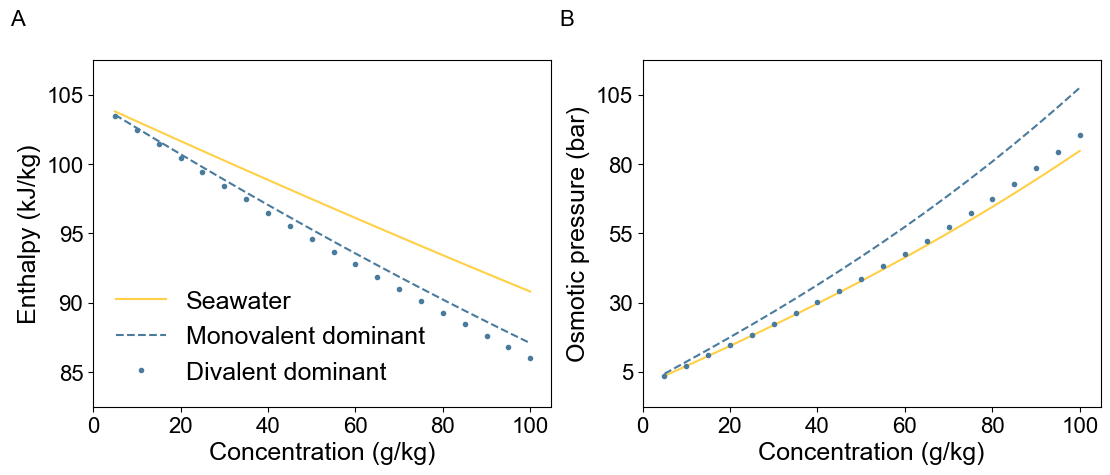

In [27]:
fig, axs = plt.subplots(ncols=2, nrows=1,figsize=(13,4.5),)
data_bw_2 = data_bw[(data_bw["Mono to Di Ratio"]==2)]
data_bw_25 = data_bw[(data_bw["Mono to Di Ratio"]==0.5)]

axs[0].text(-19, 110, "A")
axs[1].text(-19, 130, "B")
# axs[0].set_title("A", loc="left", pad=15)
# axs[1].set_title("B", loc="left", pad=15)

axs[0].plot(data_sea['# Feed Mass Frac']*1000, -data_sea['Enthalpy']/1000, color=sea_color)
axs[0].plot(data_bw_2['# Feed Mass Frac']*1000, -data_bw_2['Enthalpy']/1000, "--", color=bw_color)
axs[0].plot(data_bw_25['# Feed Mass Frac']*1000, -data_bw_25['Enthalpy']/1000, ".", color=bw_color)

axs[0].set_xlabel("Concentration (g/kg)", fontsize=title_size)
axs[0].set_ylabel("Enthalpy (kJ/kg)", fontsize=title_size)
axs[0].set_xticks([0, 20, 40, 60, 80, 100])
spacing_factor = 2
yformat=[[85,105],5]
ylim = yformat[0]
yinc = yformat[1]
axs[0].set_ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
axs[0].set_yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1))
# axs[0].set_yticks([85,90,95,100,105])

axs[1].plot(data_sea['# Feed Mass Frac']*1000, data_sea['Osmotic Pressure']/1e5, color=sea_color)
axs[1].plot(data_bw_2['# Feed Mass Frac']*1000, data_bw_2['Osmotic Pressure']/1e5, "--", color=bw_color)
axs[1].plot(data_bw_25['# Feed Mass Frac']*1000, data_bw_25['Osmotic Pressure']/1e5, ".", color=bw_color)

axs[1].set_xlabel("Concentration (g/kg)", fontsize=title_size)
axs[1].set_ylabel("Osmotic pressure (bar)", fontsize=title_size)


axs[0].legend(["Seawater","Monovalent dominant","Divalent dominant"], loc="lower left", fontsize=title_size, frameon=False)
axs[1].set_xticks([0, 20, 40, 60, 80, 100])
spacing_factor = 2
yformat=[[5,105],25]
ylim = yformat[0]
yinc = yformat[1]
axs[1].set_ylim(ylim[0]-yinc/spacing_factor, ylim[1]+yinc/spacing_factor)
axs[1].set_yticks(np.linspace(ylim[0], ylim[1], int(round((ylim[1]-ylim[0])/yinc))+1))

axs[1].yaxis.set_tick_params(labelbottom=True)

fig.savefig("Mono_Di_Enth_Osm_P",bbox_inches="tight",dpi=600)